In [62]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [68]:

time_series = np.array([0, 1, 3, 2, 9, 1, 14, 15, 1, 3, 2, 10, 7]).astype(np.float64)
window_size = 3
matrix_profile = stumpy.stump(time_series, m=window_size)
# mp[mp_idx, 0] -> Euclidean Distance
# mp[mp_idx, 1] -> Index Nearest Neighbor
# mp[mp_idx, 2] -> Index “left” Nearest Neighbor
# mp[mp_idx, 3] -> Index “right” Nearest Neighbor
# print(f"Example: MP Values for Subsequence at index {window_size}: {matrix_profile[window_size]}")
print(matrix_profile)

[[0.7702190060787928 9 -1 9]
 [0.0 8 -1 8]
 [0.030299552681211015 9 0 9]
 [1.0873222101650468 1 1 8]
 [0.8965754721680533 2 2 9]
 [0.763258877635929 10 1 10]
 [1.4569402630362343 3 3 8]
 [2.104535625211977 4 4 9]
 [0.0 1 1 10]
 [0.030299552681211015 2 2 -1]
 [0.24807274807055538 8 8 -1]]


### Discord (anomalies/novelties) ###

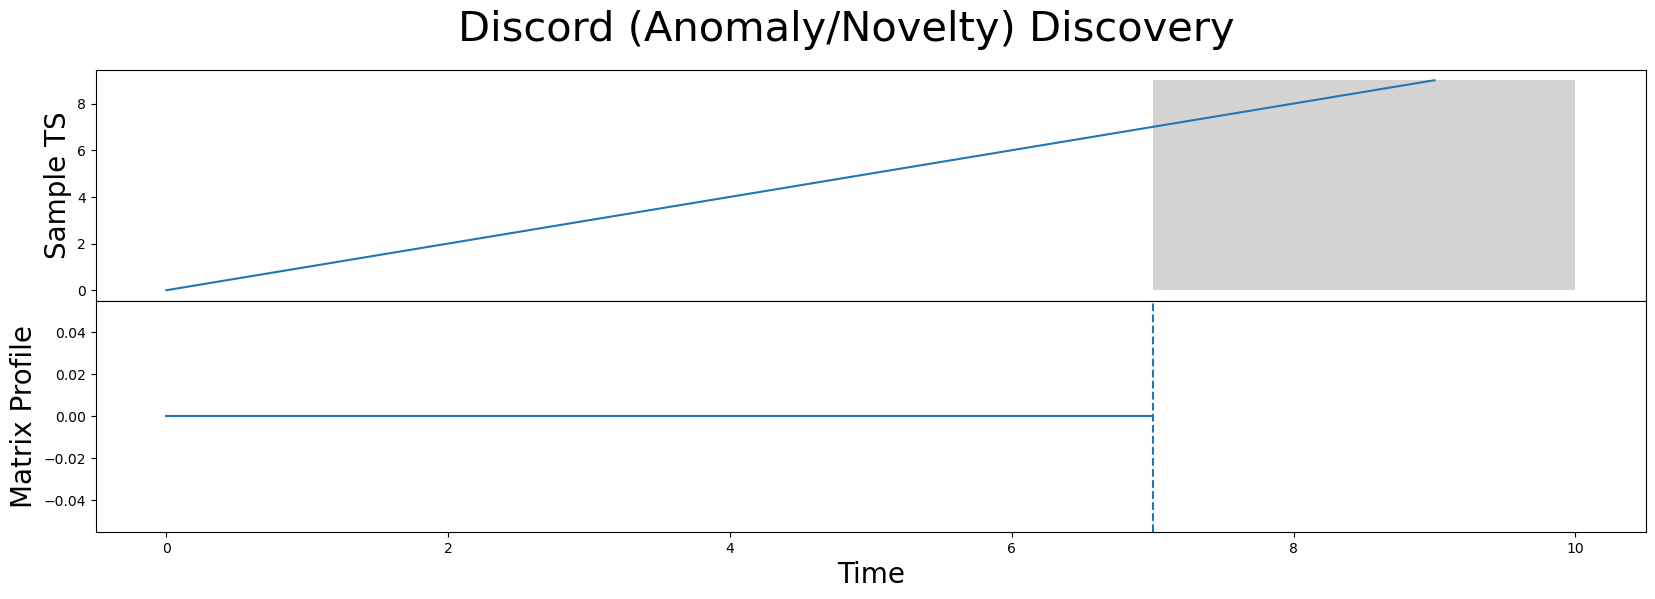

In [64]:
# the global maximum from the matrix profile correspond to the discord
discord_idx = np.argsort(matrix_profile[:, 0])[-1] # startindex of discord with length m

## Visualize Discord ##
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(time_series)
axs[0].set_ylabel('Sample TS', fontsize='20')
rect = Rectangle((discord_idx, 0), window_size, np.amax(time_series), facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(matrix_profile[:, 0])
plt.show()

### Motif Pair (Top-2 Motifs) (repeating patterns) ###

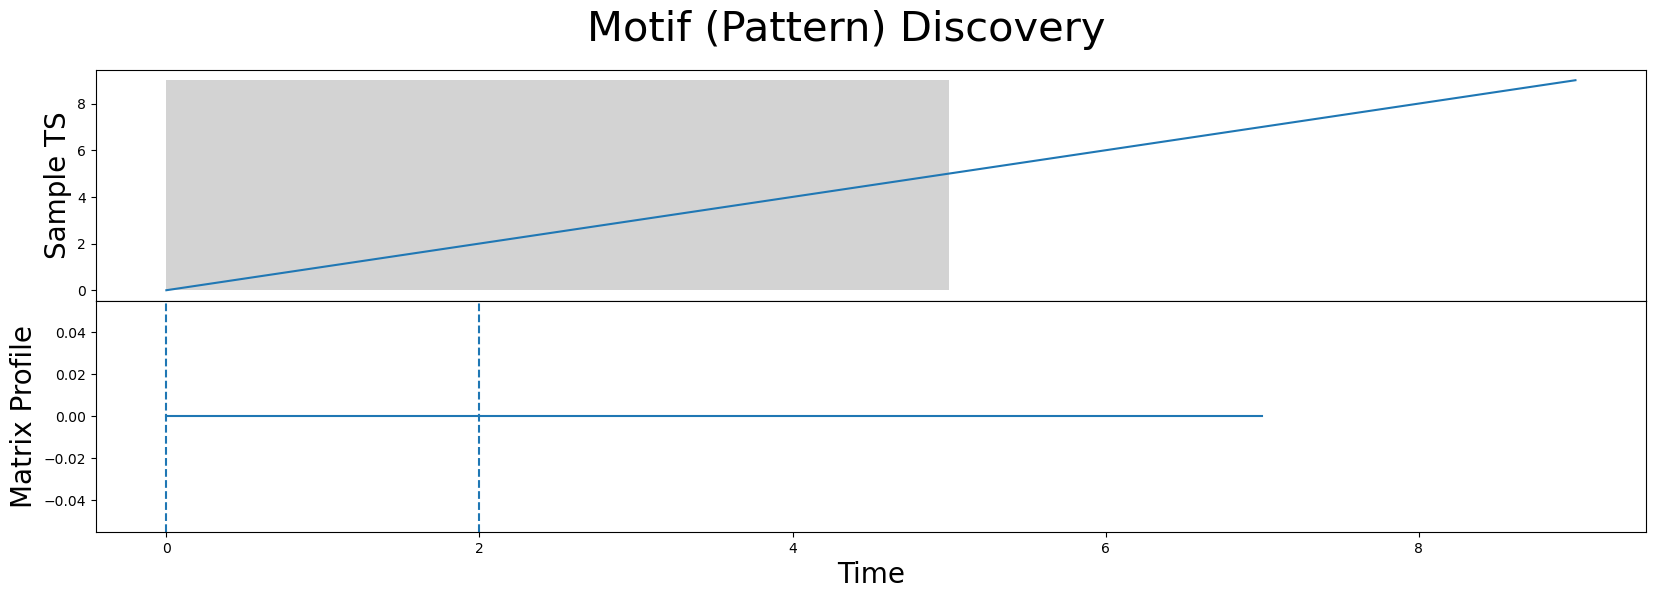

In [65]:
# the global minima from the matrix profile correspond to the locations of the two subsequences that make up the motif pair
motif_idx = np.argsort(matrix_profile[:, 0])[0] # startindex of motif with length m
motif_nearest_neighbor_idx = matrix_profile[motif_idx, 1] # startindex of motif with length m

## Visualize Motifs ##
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(time_series)
axs[0].set_ylabel('Sample TS', fontsize='20')
rect = Rectangle((motif_idx, 0), window_size, np.amax(time_series), facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((motif_nearest_neighbor_idx, 0), window_size, np.amax(time_series), facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=motif_nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(matrix_profile[:, 0])
plt.show()

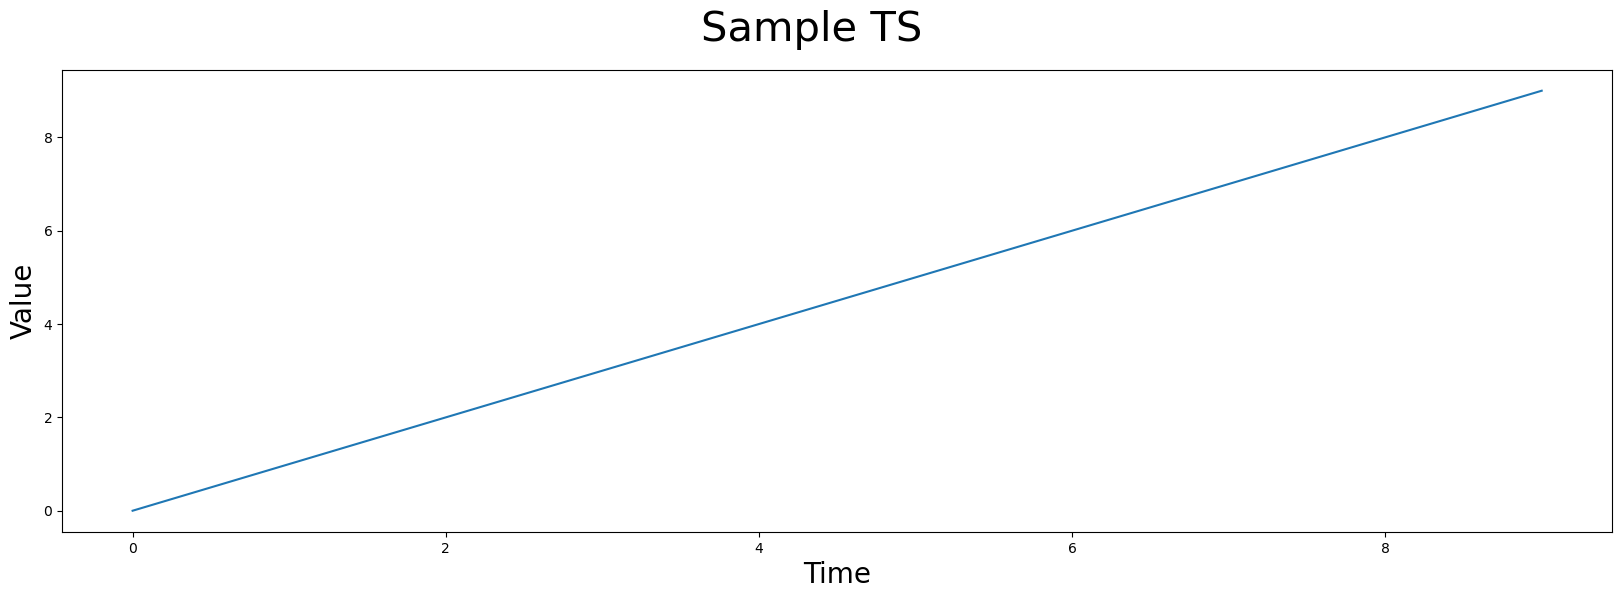

In [66]:
plt.suptitle('Sample TS', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Value', fontsize='20')
plt.plot(time_series)
plt.show()